In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [2]:
red_wine = pd.read_csv('winequality-red.csv')
white_wine = pd.read_csv('winequality-white.csv')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
len(red_wine)

1599

In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
len(white_wine)

4898

In [5]:
wine = pd.concat([red_wine, white_wine])
wine.set_index(np.array(range(len(wine))), inplace = True)

In [6]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D5168A9B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024D51BCFDD8>]], dtype=object)

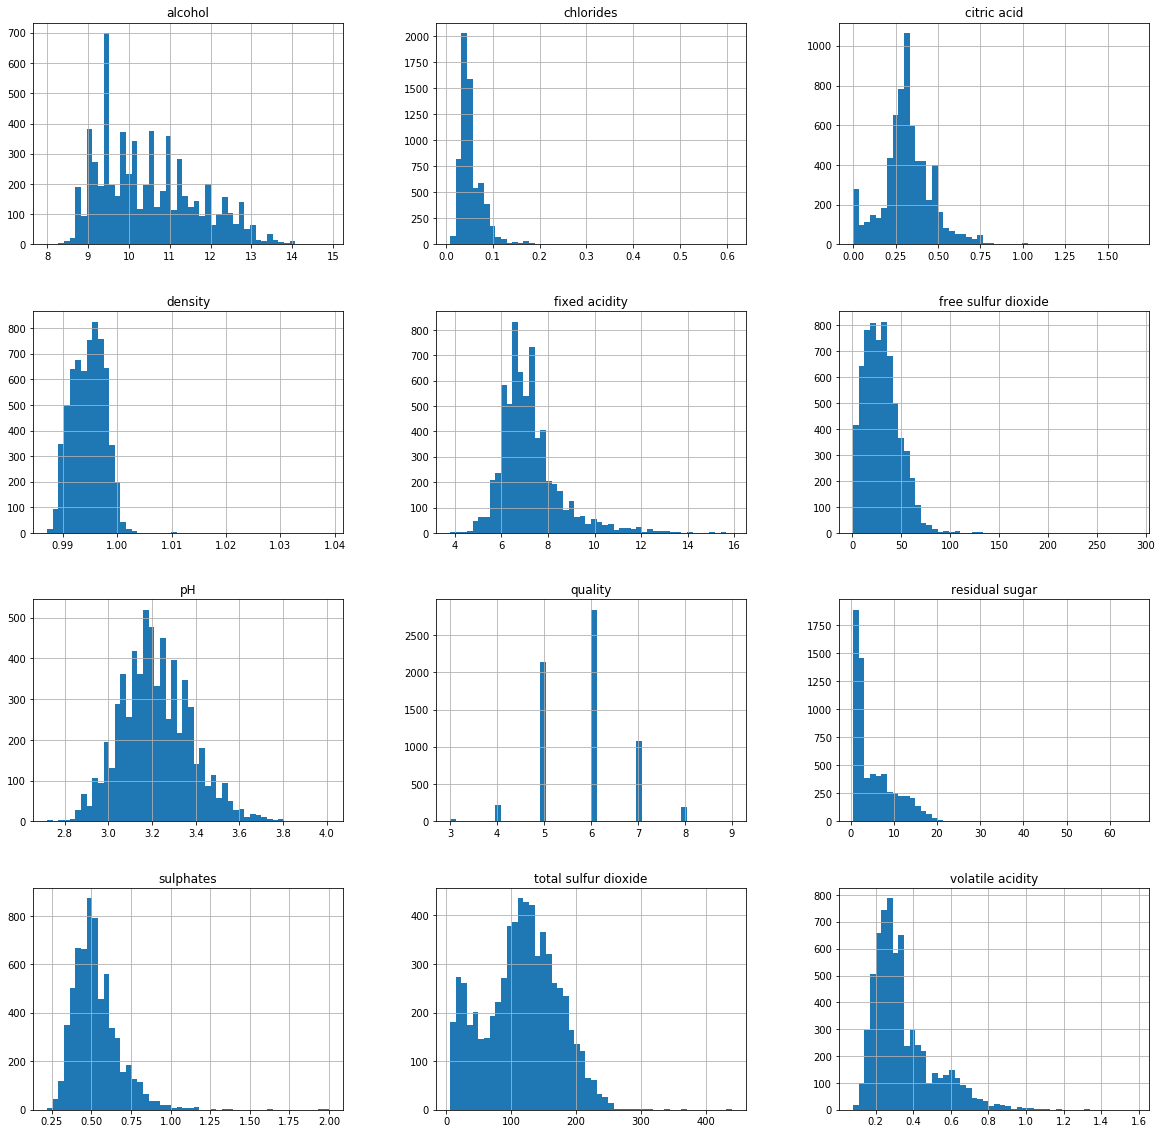

In [9]:
wine.hist(figsize=(20,20), bins=50)

In [10]:
skew0 = wine.skew()
skew0

fixed acidity           1.723290
volatile acidity        1.495097
citric acid             0.471731
residual sugar          1.435404
chlorides               5.399828
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [182]:
model = PLSRegression(scale=False, n_components=11)
score = cross_val_score(model, wine.iloc[:,:-1], wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.571947915193


In [183]:
model = PLSRegression(n_components=11)
score = cross_val_score(model, wine.iloc[:,:-1], wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.571947915193


In [186]:
test_data = np.log1p(wine.iloc[:,:-1])
skew1 = test_data.skew()

In [33]:
abs(skew0.iloc[:-1]) > abs(skew1)

fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide      True
total sulfur dioxide    False
density                  True
pH                       True
sulphates                True
alcohol                  True
dtype: bool

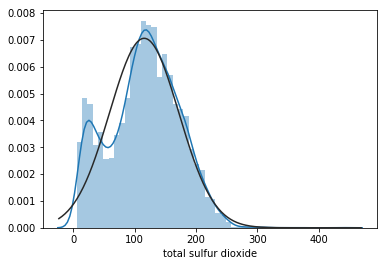

In [23]:
sns.distplot(wine['total sulfur dioxide'], fit=norm)

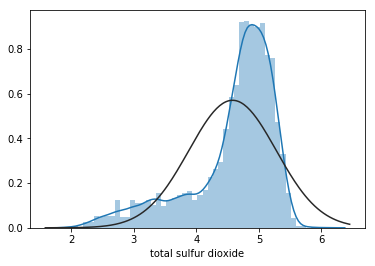

In [24]:
sns.distplot(test_data['total sulfur dioxide'], fit=norm)

In [188]:
model = PLSRegression(n_components=11)
score = cross_val_score(model, test_data, wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.568378635584


In [189]:
test_data['total sulfur dioxide'] = wine['total sulfur dioxide']
#test_data['quality'] = wine['quality']

#model = PLSRegression()
score = cross_val_score(model, test_data, wine.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.569249879475


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D5503E7B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024D55C1FCF8>]], dtype=object)

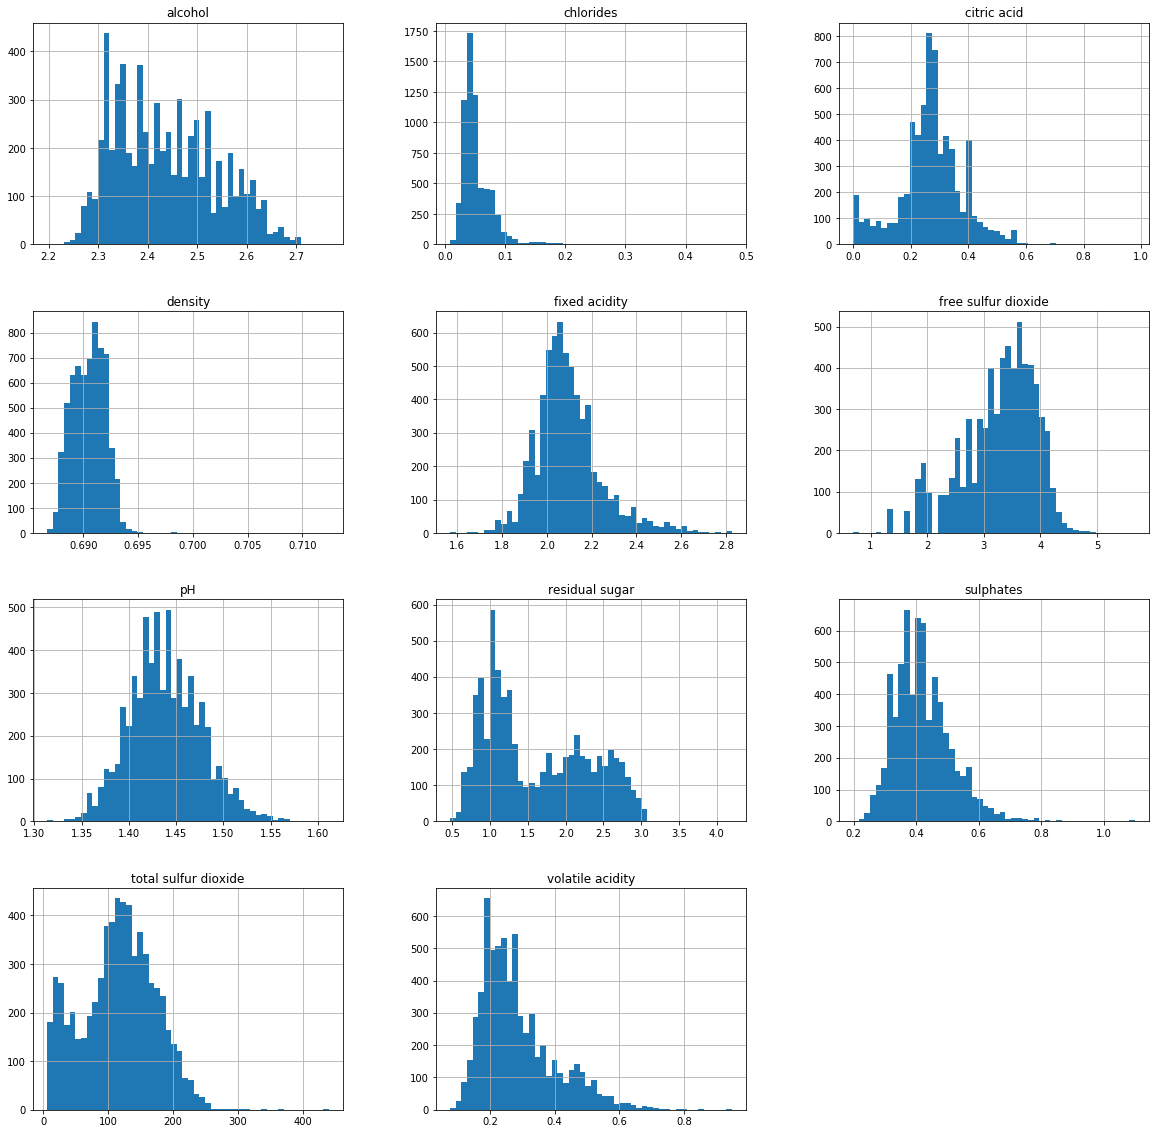

In [43]:
test_data.hist(figsize=(20,20), bins=50)

In [38]:
skew2 = test_data.skew()

In [200]:
#test_data = wine.iloc[:,:-1].copy()

for i in test_data:
    test_data[i] = StandardScaler().fit_transform(test_data[i].values.reshape(-1,1))

test_data['quality'] = wine['quality']

outliers =[]

for i in range(len(test_data)):
    for j in test_data.iloc[i,:-1]:
        if j > 3 or j < -3:
            outliers.append(i)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [201]:
outliers = pd.DataFrame(pd.Series(outliers).value_counts(), columns = ['count'])

In [202]:
outliers['count'].value_counts()

1    324
2     34
4      1
3      1
Name: count, dtype: int64

In [197]:
for i in np.array(outliers.index):
    if outliers.loc[i].values < 4:
        outliers.drop(i, inplace=True)

log_data = test_data.copy()
log_data.drop(outliers.index, inplace = True)
score = cross_val_score(model, log_data.iloc[:,:-1], log_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.569021893566


In [99]:
for i in np.array(outliers.index):
    if outliers.loc[i].values < 3:
        outliers.drop(i, inplace=True)

log_data = test_data.copy()
log_data.drop(outliers.index, inplace = True)
score = cross_val_score(model, log_data.iloc[:,:-1], log_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.580626623168


In [107]:
for i in np.array(outliers.index):
    if outliers.loc[i].values < 2:
        outliers.drop(i, inplace=True)

log_data = test_data.copy()
log_data.drop(outliers.index, inplace = True)
score = cross_val_score(model, log_data.iloc[:,:-1], log_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.580656537732


In [203]:
for i in np.array(outliers.index):
    if outliers.loc[i].values < 1:
        outliers.drop(i, inplace=True)

log_data = test_data.copy()
log_data.drop(outliers.index, inplace = True)
score = cross_val_score(model, log_data.iloc[:,:-1], log_data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.566170613853


In [123]:
len(outliers) / len(wine)

0.055410189318146834

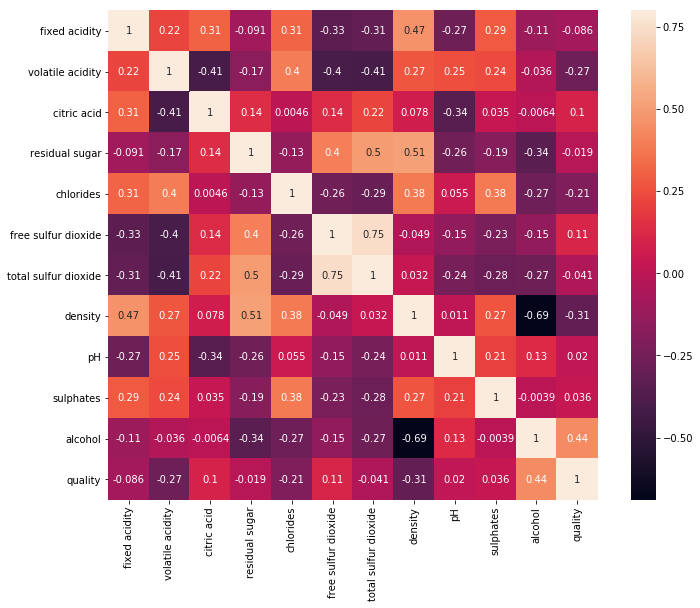

In [113]:
corrmat = log_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

In [205]:
for i in log_data:
    if i == 'quality':
        pass
    else:
        test = log_data.drop(i, axis=1)
        model = PLSRegression(n_components=2)
        score = cross_val_score(model, test.iloc[:,:-1], test.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
        print(i,score.mean())

fixed acidity -0.574592151374
volatile acidity -0.58408909161
citric acid -0.572714386186
residual sugar -0.586880845437
chlorides -0.574991308047
free sulfur dioxide -0.578982638821
total sulfur dioxide -0.579481855687
density -0.579079974799
pH -0.578162510462
sulphates -0.582063767269
alcohol -0.613844290171


In [125]:
copy = log_data.copy()
copy.insert(5, 'sulfur ratio', copy['free sulfur dioxide'] / copy['total sulfur dioxide'])
copy.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)
score = cross_val_score(model, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.579906118248


In [131]:
copy = log_data.copy()

copy.drop(['citric acid'], axis=1, inplace=True)
score = cross_val_score(model, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.572714386186


In [133]:
for i in copy:
    if i == 'quality':
        pass
    else:
        test = copy.drop(i, axis=1)
        score = cross_val_score(model, test.iloc[:,:-1], test.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
        print(i,score.mean())

fixed acidity -0.572697169216
volatile acidity -0.584903771355
residual sugar -0.585005407691
chlorides -0.574315522947
free sulfur dioxide -0.575102856599
total sulfur dioxide -0.576620247457
density -0.576596031998
pH -0.574368865714
sulphates -0.579029433288
alcohol -0.611573808208


In [134]:

copy.insert(5, 'sulfur ratio', copy['free sulfur dioxide'] / copy['total sulfur dioxide'])
copy.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)
score = cross_val_score(model, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.576502913562


In [137]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [136]:
quality3 = wine[wine['quality'] == 3]
quality4 = wine[wine['quality'] == 4]
quality5 = wine[wine['quality'] == 5]
quality6 = wine[wine['quality'] == 6]
quality7 = wine[wine['quality'] == 7]
quality8 = wine[wine['quality'] == 8]
quality9 = wine[wine['quality'] == 9]

In [159]:
resampled_wine = []

random_wine = np.random.choice(quality3.index, int(len(quality3.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality4.index, int(len(quality4.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality5.index, int(len(quality5.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality6.index, int(len(quality6.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality7.index, int(len(quality5.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality8.index, int(len(quality4.index)/2), replace = False)
resampled_wine.extend(random_wine)
random_wine = np.random.choice(quality9.index, int(len(quality3.index)/2), replace = True)
resampled_wine.extend(random_wine)

data = wine.loc[resampled_wine]

In [160]:
data['quality'].value_counts()

6    1418
7    1069
5    1069
8     108
4     108
9      15
3      15
Name: quality, dtype: int64

In [161]:
score = cross_val_score(model, data.iloc[:,:-1], data.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.648543137733


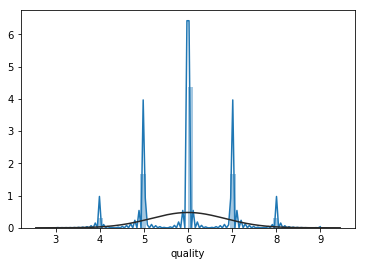

In [145]:
sns.distplot(data['quality'], fit=norm)

In [179]:
model = PLSRegression(n_components=11)
model.fit(data.iloc[:,:-1],data.iloc[:,-1])
mean_absolute_error(wine.iloc[:,-1], model.predict(wine.iloc[:,:-1]))

0.57911253028549647

In [206]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [207]:
forest.fit(data.iloc[:,:-1],data.iloc[:,-1])
mean_absolute_error(wine.iloc[:,-1], forest.predict(wine.iloc[:,:-1]))

0.31289826073572413

In [208]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor()

In [209]:
boost.fit(data.iloc[:,:-1],data.iloc[:,-1])
mean_absolute_error(wine.iloc[:,-1], boost.predict(wine.iloc[:,:-1]))

0.51302103478684613

In [210]:
score = cross_val_score(boost, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.562525519285


In [211]:
score = cross_val_score(forest, copy.iloc[:,:-1], copy.iloc[:,-1], cv=20, scoring='neg_mean_absolute_error')
print(score.mean())

-0.587044985204


In [212]:
from sklearn import linear_model
clf = linear_model.Lasso()
clf.fit(data.iloc[:,:-1],data.iloc[:,-1])
mean_absolute_error(wine.iloc[:,-1], clf.predict(wine.iloc[:,:-1]))

0.64654161086284323